In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


file_path = 'dataset for assignment 2.csv'
data = pd.read_csv(file_path)

data.head()


,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [2]:
data.describe()

,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.423600,124.366400,92.550400,432.316000
std,1443.520003,12.160631,42.689317,36.746095,187.427426
min,1.000000,18.000000,50.000000,26.000000,102.000000
25%,1250.750000,28.000000,89.000000,63.000000,285.000000
50%,2500.500000,39.000000,124.000000,89.000000,406.000000
75%,3750.250000,49.000000,161.000000,118.000000,560.000000
max,5000.000000,59.000000,199.000000,195.000000,987.000000


In [3]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

correlation_matrix


,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
User ID,1.000000,0.003109,-0.011143,-0.002194,0.000204
Age,0.003109,1.000000,-0.001718,-0.003733,-0.003620
App Sessions,-0.011143,-0.001718,1.000000,0.857045,0.795404
Distance Travelled (km),-0.002194,-0.003733,0.857045,1.000000,0.680502
Calories Burned,0.000204,-0.003620,0.795404,0.680502,1.000000


In [4]:
gender_analysis = data.groupby('Gender').agg({
    'App Sessions': 'mean',
    'Distance Travelled (km)': 'mean',
    'Calories Burned': 'mean'
}).reset_index()

gender_analysis

,Gender,App Sessions,Distance Travelled (km),Calories Burned
0,Female,124.619009,92.508530,434.103574
1,Male,124.121355,92.591017,430.581954


In [5]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'])

X = data_encoded.drop(columns=['User ID', 'Calories Burned'])
y = data_encoded['Calories Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:\n', feature_importance)

Mean Squared Error: 13054.869130210587
Feature Importance:
 Location_Rural              4.645824
App Sessions                3.513941
Activity Level_Moderate     1.124619
Gender_Female               0.571498
Age                         0.052453
Distance Travelled (km)    -0.045714
Activity Level_Active      -0.255413
Gender_Male                -0.571498
Activity Level_Sedentary   -0.869205
Location_Suburban          -1.747726
Location_Urban             -2.898099
dtype: float64


Mean Squared Error: 13054.869130210587
Feature Importance:
 Location_Rural              4.645824
App Sessions                3.513941
Activity Level_Moderate     1.124619
Gender_Female               0.571498
Age                         0.052453
Distance Travelled (km)    -0.045714
Activity Level_Active      -0.255413
Gender_Male                -0.571498
Activity Level_Sedentary   -0.869205
Location_Suburban          -1.747726
Location_Urban             -2.898099
dtype: float64


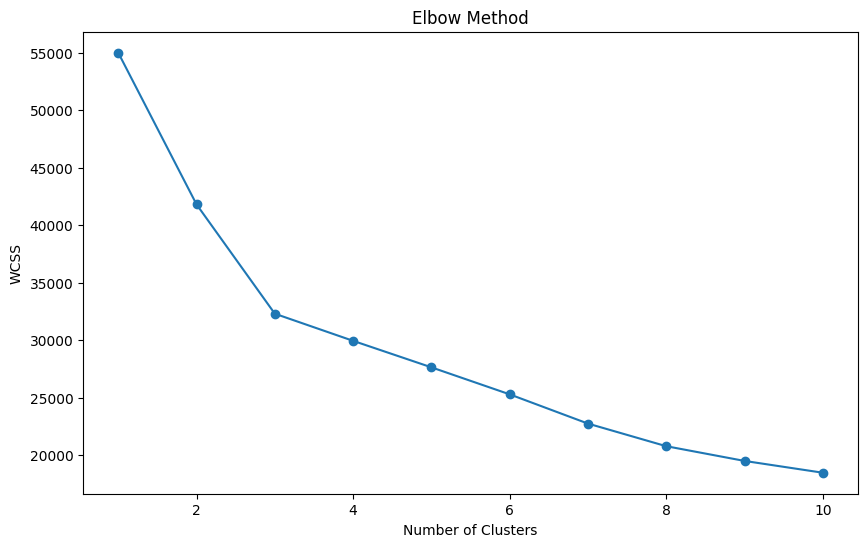

Cluster Centroids:
          Age  App Sessions  Distance Travelled (km)  Gender_Female  \
0  38.618224    124.159746                92.554210       0.478085   
1  38.208333    174.202819               129.253064       0.502451   
2  38.432069     74.810282                55.888617       0.497552   

   Gender_Male  Activity Level_Active  Activity Level_Moderate  \
0     0.521915          -6.106227e-16             1.000000e+00   
1     0.497549           1.000000e+00            -9.992007e-16   
2     0.502448          -5.551115e-16            -9.992007e-16   

   Activity Level_Sedentary  Location_Rural  Location_Suburban  Location_Urban  
0             -4.440892e-16        0.354671           0.344867        0.300461  
1             -3.330669e-16        0.328431           0.318627        0.352941  
2              1.000000e+00        0.326193           0.342717        0.331089  
Cluster Analysis:
              User ID        Age  App Sessions  Distance Travelled (km)  \
Cluster          

In [6]:
data = data.dropna()
data_encoded = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'])
X = data_encoded.drop(columns=['User ID', 'Calories Burned'])
y = data_encoded['Calories Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
feature_importance = pd.Series(reg_model.coef_, index=X.columns).sort_values(ascending=False)
print('Feature Importance:\n', feature_importance)
cluster_features = data_encoded.drop(columns=['User ID', 'Calories Burned'])
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_features_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(cluster_features_scaled)
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_features.columns)
print('Cluster Centroids:\n', cluster_centroids)
numeric_columns = data.select_dtypes(include='number').columns
cluster_analysis = data[numeric_columns].groupby('Cluster').mean()
print('Cluster Analysis:\n', cluster_analysis)

In [7]:
threshold = data_encoded['Calories Burned'].median()
data_encoded['High_Calories_Burned'] = (data_encoded['Calories Burned'] > threshold).astype(int)
X = data_encoded.drop(columns=['User ID', 'Calories Burned', 'High_Calories_Burned'])
y = data_encoded['High_Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.811
Precision: 0.7723880597014925
Recall: 0.8607068607068608
Confusion Matrix:
 [[397 122]
 [ 67 414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       519
           1       0.77      0.86      0.81       481

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000

